ДЗ к 5 уроку ML in business

## Задание

1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями
2. Добавьте первые разности по стоимости доллара и евро к рублю
3. сделайте ее перрасчет (ресемплинг) в представление по неделям. 
4. Постройте модель предсказания 1-й точки от текущей (h=1).

5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

C:\Users\LMAXL\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Brent 2010-2019
Цена нефти марки Brent. Данные по неделям от 2010 до 2019. Отличие от исходного описания - дополнение признаками по календарю.

In [2]:

path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


Ресемплинг по неделям:

In [3]:
brent_data_w = brent_data.copy().resample('W').mean()
brent_data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


Колонки на основе дней потеряли актуальность - удаляем

In [4]:
brent_data_w.drop(['dayofweek','dayofmonth','dayofyear'], axis=1,inplace=True)

In [5]:
brent_data_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 8 columns):
Значение           469 non-null float64
year               469 non-null float64
month              469 non-null float64
quarter            469 non-null float64
weekofyear         469 non-null float64
is_holiday         469 non-null float64
is_prev_holiday    469 non-null float64
is_next_holiday    469 non-null float64
dtypes: float64(8)
memory usage: 33.0 KB


Есть один пропуск (причина - в исходном сэте нет данных за эту неделю)

In [6]:
brent_data_w.loc[brent_data_w['Значение'].isnull()]

,Значение,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
brent_data_w = brent_data_w.interpolate()

In [8]:
brent_data_w['2011-10-09':'2011-10-23']

,Значение,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,
2011-10-09,103.476667,2011.0,10.0,4.0,40.0,0.0,0.166667,0.0
2011-10-16,106.616667,2011.0,10.0,4.0,41.0,0.0,0.083333,0.0
2011-10-23,109.756667,2011.0,10.0,4.0,42.0,0.0,0.000000,0.0


Общий вид изменения цены по ряду приведен на рис.

Text(0.5, 0, 't')

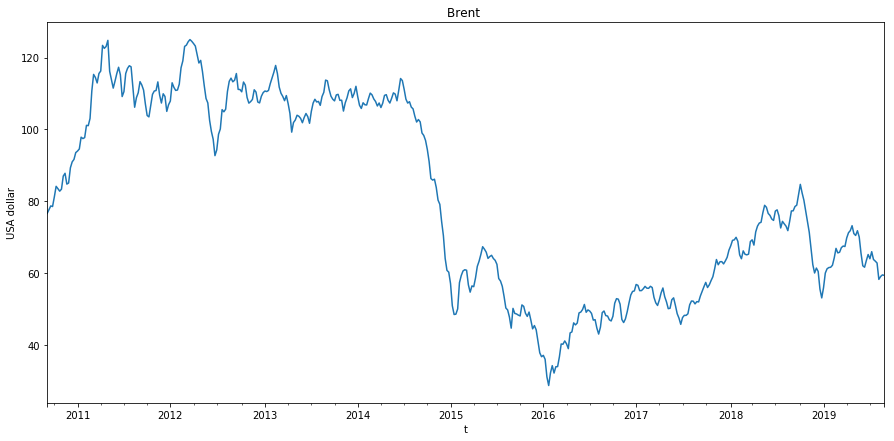

In [9]:
_ = brent_data_w['Значение'].plot(figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Рис. Цена нефти с 2010 по 2019 (средняя цена по неделям)

Помним, что наиболее интересным для и интерпретируемым у этого ряда является поведение его первых разностей
Построим их и посмотрим на аномалии этой части нашей модели.

In [10]:
d_brent_data = brent_data_w['Значение'].values[1:]- brent_data_w['Значение'].values[:-1]
pd.DataFrame(d_brent_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 1 columns):
0    469 non-null float64
dtypes: float64(1)
memory usage: 3.8 KB


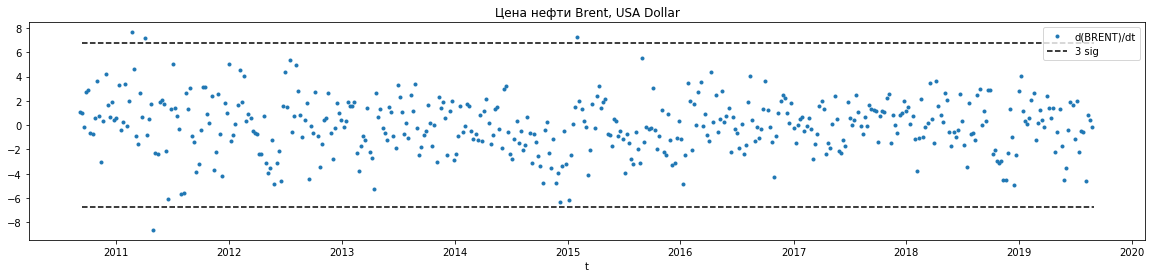

In [11]:
d_brent_data = brent_data_w['Значение'].values[1:]- brent_data_w['Значение'].values[:-1]
s_brent = np.std(d_brent_data)*3
plt.figure(figsize=(20,4))
plt.plot(brent_data_w.iloc[:-1].index,d_brent_data,'.', label='d(BRENT)/dt')
plt.plot(brent_data_w.iloc[[1,-1]].index,[s_brent, s_brent],'--k',label ='3 sig')
plt.plot(brent_data_w.iloc[[1,-1]].index,[-s_brent, -s_brent],'--k')
plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

ind_anomal_brent = np.where( abs(d_brent_data)>s_brent)[0]



Рис.4 BRENT первые разности

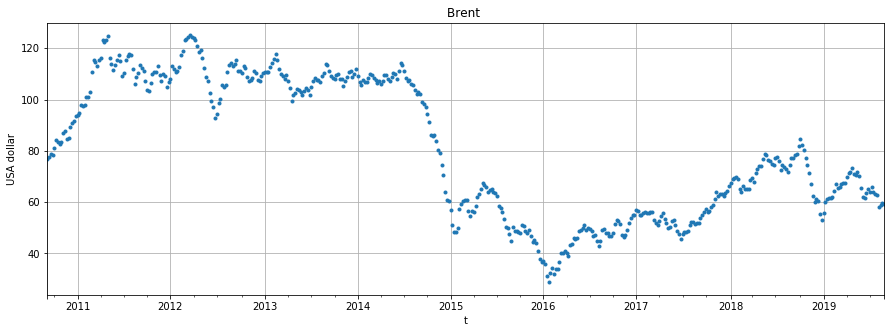

In [12]:
_ = brent_data_w['Значение'].plot( style='.', figsize=( 15, 5 ), title='Brent ')
plt.plot(brent_data_w.iloc[ind_anomal_brent].index,brent_data_w['Значение'].values[ind_anomal_brent],'*k', label='BRENT anomaly')
plt.ylabel('USA dollar')
plt.grid()
plt.xlabel('t')
plt.show()

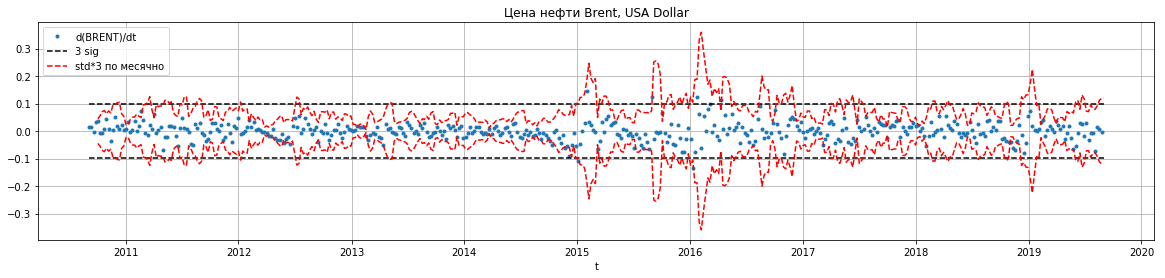

In [13]:
d_brent_data1 = (brent_data_w['Значение'].values[1:]- brent_data_w['Значение'].values[:-1])/brent_data_w['Значение'].values[:-1]
std_d_brent = pd.DataFrame(data=d_brent_data1,index =brent_data_w.index[1:] ).rolling(4).std()
s_brent1 = np.std(d_brent_data1)*3 
plt.figure(figsize=(20,4))
plt.plot(brent_data_w.iloc[:-1].index,d_brent_data1,'.', label='d(BRENT)/dt')
plt.plot(brent_data_w.iloc[[0,-1]].index,[s_brent1, s_brent1],'--k',label ='3 sig')
plt.plot(brent_data_w.iloc[[0,-1]].index,[-s_brent1, -s_brent1],'--k')
plt.plot(std_d_brent.index,std_d_brent*3,'--r',label = 'std*3 по месячно')
plt.plot(std_d_brent.index,-std_d_brent*3,'--r')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

ind_anomal_brent1 = np.where( abs(d_brent_data1)>s_brent1)[0]
ind_anomal_brent2 = np.where( abs(d_brent_data1)>std_d_brent.values)[0]

In [14]:
brent_data_w.index[[0,-1]]

DatetimeIndex(['2010-09-05', '2019-09-01'], dtype='datetime64[ns]', name='Дата', freq=None)

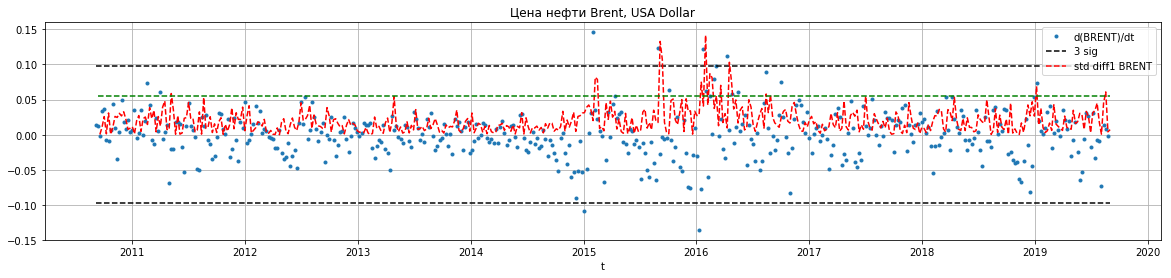

In [15]:
brent_diff1=pd.DataFrame(data=d_brent_data1, index=brent_data_w.index[1:])

brent_diff1_std=brent_diff1[0].rolling(2).std()
brent_diff_std=np.std(brent_diff1_std)*3

ind_anomal_brent2 = np.where( abs(brent_diff1_std)>brent_diff_std)[0]

plt.figure(figsize=(20,4))
plt.plot(brent_data_w.iloc[:-1].index,d_brent_data1,'.', label='d(BRENT)/dt')
plt.plot(brent_data_w.iloc[[0,-1]].index,[s_brent1, s_brent1],'--k',label ='3 sig')
plt.plot(brent_data_w.iloc[[0,-1]].index,[-s_brent1, -s_brent1],'--k')
plt.plot(brent_diff1_std,'--r',label ='std diff1 BRENT')
plt.plot(brent_diff1_std.iloc[[0,-1]].index,[brent_diff_std,brent_diff_std],'--g')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()


In [16]:
brent_diff_std

0.054803136408699535

In [17]:
p =3

#добавляем историю длиной р
for i in range(p):
    brent_data_w['t'+str(p-i+1)]=0
    brent_data_w['t'+str(p-i+1)].values[p+2:] = brent_data_w['Значение'].values[i+1:-(p-i+1)]
for i in range(p):
    brent_data_w['d'+str(p-i+1)]=0    
    brent_data_w['d'+str(p-i+1)].values[i+1:] =( (brent_data_w['Значение'].values[i+1:]- brent_data_w['Значение'].values[i:-1]))


In [18]:

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

scl=StandardScaler()

from sklearn.cluster import KMeans, DBSCAN

In [19]:

X = brent_data_w.iloc[p+2:,:].values

Xscale = scl.fit_transform(X)

clast = DBSCAN(eps=2.9, leaf_size=1, min_samples = 3)
X_scale_clast =clast.fit_predict(Xscale)


первый элемент кластера 0  :  [ 0.12530289 -1.81484223  1.02032055  1.34526782  0.89820705 -0.42987718
  2.17705746 -0.44499427 -0.13031661 -0.09126662 -0.08967632  1.08163264
  1.08163264  1.08163264]
Число кластеров с масштабированием:  3
Число не кластеров:  13


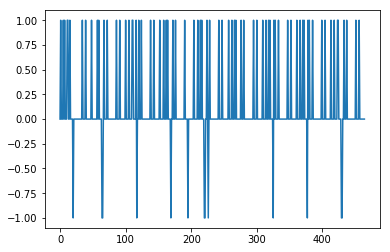

In [20]:
# не шум, но кластер со смыслом
ind_= np.where(X_scale_clast !=-1)[0]
print('первый элемент кластера',X_scale_clast[ind_[0]],' : ',clast.components_[0])
print('Число кластеров с масштабированием: ',len(np.unique(X_scale_clast)-1))

n_noise = list(clast.labels_).count(-1)

print('Число не кластеров: ',n_noise)

plt.plot(X_scale_clast)
plt.show()

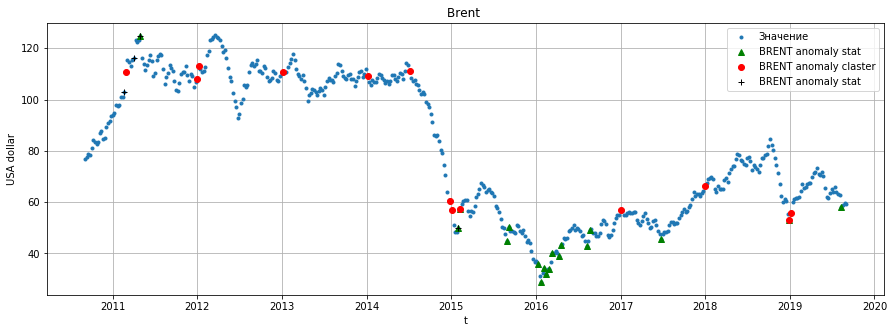

In [21]:
ind_anomal_brent_c= np.where(X_scale_clast ==-1)[0]  # индексы аномалий (наверное аномалий - будем смотреть)

ind_anomal_brent_c = np.array(ind_anomal_brent_c)+p+2  

plt.figure(figsize=( 15, 5 ))
plt.title('Brent ')
plt.plot(brent_data_w['Значение'], '.')
plt.plot(brent_data_w.iloc[ind_anomal_brent2].index,brent_data_w['Значение'].values[ind_anomal_brent2],'^g', label='BRENT anomaly stat')
plt.plot(brent_data_w.iloc[ind_anomal_brent_c].index,brent_data_w['Значение'].values[ind_anomal_brent_c],'or', label='BRENT anomaly claster')
plt.plot(brent_data_w.iloc[ind_anomal_brent].index,brent_data_w['Значение'].values[ind_anomal_brent],'+k', label='BRENT anomaly stat')
plt.legend()
plt.grid()
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.show()

Построили несколько кандидатов на аномальное поведение. Попробуем определить какой-нибудь дополнительный способ анализа.

## Генерация признаков  из внешних источников

Естественным попутчиком любого финансово -ориентированного ряда является кросс-курс валют. В случае BRENT патриотично рассматриваем кросс-курс доллар-рубль (стоимость доллара в рублях) и евро-рубль (стоимость евро в рублях). Интервал измерения стоимости доллара и евро соответствует частоте и периоду нашего ряда "стоимость нефти", а источник данных https://www.cbr.ru/currency_base/dynamics/?UniDbQuery.Posted=True&UniDbQuery.mode=1&UniDbQuery.date_req1=&UniDbQuery.date_req2=&UniDbQuery.VAL_NM_RQ=R01235&UniDbQuery.FromDate=01.09.2010&UniDbQuery.ToDate=01.09.2019, который позволяет сохранить результаты в нескольких различных вариантах. Прочитаем, сохраненные данные.

In [22]:
rub_doll=pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll = pd.DataFrame(rub_doll.set_index('data')['curs'].ffill())
rub_doll = rub_doll.copy().resample('W').mean().interpolate()
rub_doll

,curs
data,
2010-09-05,30.76125
2010-09-12,30.79402
2010-09-19,30.84672
2010-09-26,30.99920
2010-10-03,30.52764
...,...
2019-08-04,63.75872
2019-08-11,65.14700
2019-08-18,65.62408


In [23]:
rub_e=pd.read_excel('R_E01_09_2010_T01_09_2019.xlsx')

rub_e = pd.DataFrame(rub_e.set_index('data')['curs'].ffill())
rub_e = rub_e.copy().resample('W').mean().interpolate()
rub_e


,curs
data,
2010-09-05,39.204675
2010-09-12,39.293360
2010-09-19,39.977740
2010-09-26,41.042640
2010-10-03,41.351660
...,...
2019-08-04,70.831120
2019-08-11,72.880080
2019-08-18,73.223880


И сделаем их визуализацию.

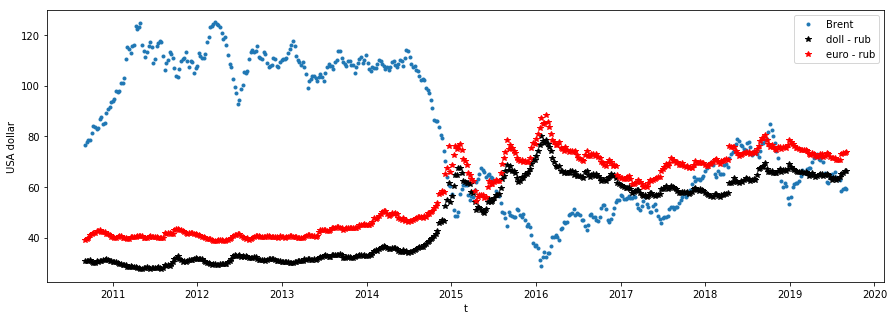

In [24]:
plt.figure(figsize=( 15, 5 ))
plt.plot(brent_data_w.index, brent_data_w['Значение'],'.', label='Brent ')
plt.plot(rub_doll.index,rub_doll['curs'].values,'*k', label='doll - rub')
plt.plot(rub_e.index,rub_e['curs'].values,'*r', label='euro - rub')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.legend()
plt.show()

Посмотрим на первые разности. Помним, что для BRENT первые разности стационарны. Проверим как выглядят они для кросс-курсов.

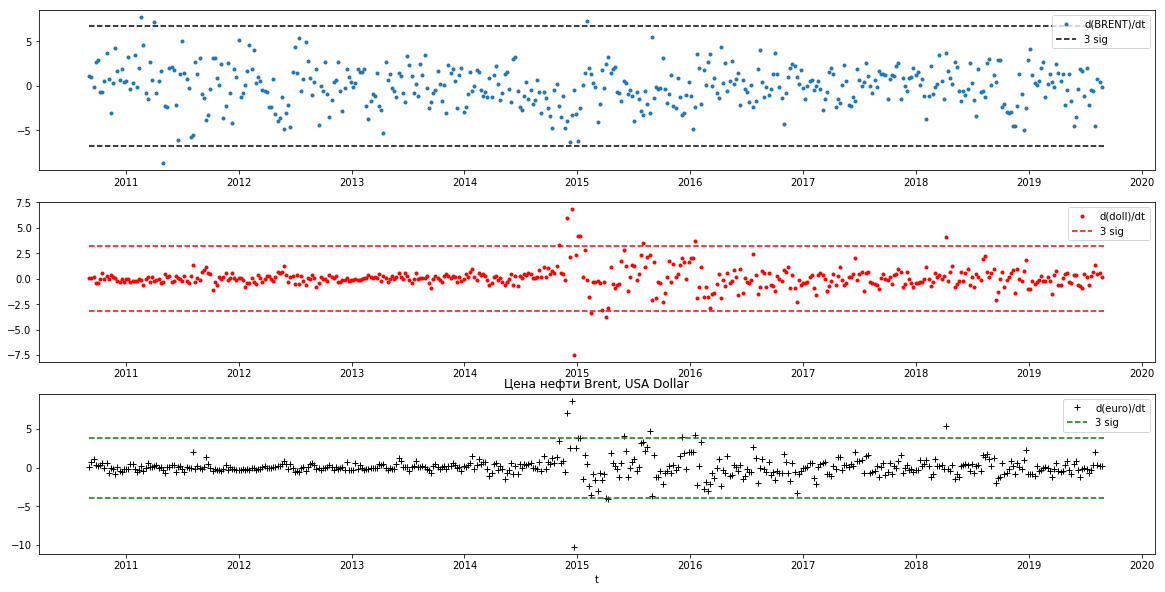

In [25]:
d_rub_doll = rub_doll['curs'].values[1:]- rub_doll['curs'].values[:-1]
s_rub = np.std(d_rub_doll)*3

d_rub_e = rub_e['curs'].values[1:]- rub_e['curs'].values[:-1]
s_rube = np.std(d_rub_e)*3

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(brent_data_w.iloc[:-1].index,d_brent_data,'.', label='d(BRENT)/dt')
plt.plot(brent_data_w.iloc[[0,-1]].index,[s_brent, s_brent],'--k',label ='3 sig')
plt.plot(brent_data_w.iloc[[0,-1]].index,[-s_brent, -s_brent],'--k')
plt.legend()

plt.subplot(3,1,2)
plt.plot(rub_doll.iloc[:-1].index,d_rub_doll,'.r', label='d(doll)/dt')
plt.plot(rub_doll.iloc[[0,-1]].index,[s_rub, s_rub],'--r',label ='3 sig')
plt.plot(rub_doll.iloc[[0,-1]].index,[-s_rub, -s_rub],'--r')
plt.legend()

plt.subplot(3,1,3)
plt.plot(rub_e.iloc[:-1].index,d_rub_e,'+k', label='d(euro)/dt')
plt.plot(rub_e.iloc[[0,-1]].index,[s_rube, s_rube],'--g',label ='3 sig')
plt.plot(rub_e.iloc[[0,-1]].index,[-s_rube, -s_rube],'--g')

plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

ind_anomal_brent = np.where( abs(d_brent_data)>s_brent)[0]
ind_anomal_rubl_d = np.where( abs(d_rub_doll)>s_rub)[0]
ind_anomal_rubl_e = np.where( abs(d_rub_e)>s_rube)[0]

   


Сопоставим списки результатов, которые вышли за границы 3 сигма.

In [26]:
ind_anomal_brent

array([ 24,  30,  34, 230], dtype=int64)

In [27]:
ind_anomal_rubl_d

array([217, 221, 223, 224, 226, 227, 232, 239, 256, 280, 396], dtype=int64)

In [28]:
ind_anomal_rubl_e

array([221, 223, 224, 239, 240, 247, 259, 274, 280, 396], dtype=int64)

Есть пересечений у первого множества со вторым и третьим нет. Покажем несколько соседних объектов из разных списков: 

In [29]:
rub_doll.index[[226, 227, 230, 232, 239]]

DatetimeIndex(['2015-01-04', '2015-01-11', '2015-02-01', '2015-02-15',
               '2015-04-05'],
              dtype='datetime64[ns]', name='data', freq=None)

In [30]:
rub_doll.loc[rub_doll.index=='2015-02-01']

,curs
data,
2015-02-01,67.6438


Проблема кросс-курса с рублем в том, что трудно сказать курс зависит от цены  нефти или цена от курса (но по логике экономики должен курс рубля зависеть от цены нефти). 2015 в январе курс к доллару составил 67.6 р на фоне резкого падения цены нефти (по причине увеличения производства нефти в США и странах ОПЕК). Однако, если в некоторый день цена нефти и кросс-курс ведут себя разнонаправленно, то можно предположить. что это не глобальное явление, а некоторый случайный выброс. Декабрь 2015-январь 2016 - смена уровня , т.е. глобальное изменение ряда по типу аномалии "изменение характера (распределения) значений". В данном случае сильно изменяется средняя ряда.

Добавим стоимость валюты в рублях

In [31]:
brent_data_w['doll']=0.0
brent_data_w['doll'].values[:]=rub_doll['curs'].values[:]
brent_data_w

,Значение,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,t4,t3,t2,d4,d3,d2,doll
Дата,,,,,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,35.0,0.000000,0.200000,0.000000,0,0,0,0,0,0,30.76125
2010-09-12,77.673333,2010.0,9.000000,3.000000,36.0,0.166667,0.000000,0.166667,0,0,0,1,0,0,30.79402
2010-09-19,78.693333,2010.0,9.000000,3.000000,37.0,0.000000,0.000000,0.000000,0,0,0,1,1,0,30.84672
2010-09-26,78.518333,2010.0,9.000000,3.000000,38.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,30.99920
2010-10-03,81.211667,2010.0,9.333333,3.333333,39.0,0.000000,0.000000,0.000000,0,0,0,2,2,2,30.52764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-04,62.791667,2019.0,7.500000,3.000000,31.0,0.000000,0.000000,0.000000,63,65,63,0,0,0,63.75872
2019-08-11,58.236667,2019.0,8.000000,3.000000,32.0,0.000000,0.000000,0.000000,65,63,63,-4,-4,-4,65.14700
2019-08-18,59.033333,2019.0,8.000000,3.000000,33.0,0.000000,0.000000,0.000000,63,63,62,0,0,0,65.62408


## Выделение существенных признаков

Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 1, тогда target = y(t+h)=y(t+1) 

In [32]:
scl_target=StandardScaler() 

h=1
target = brent_data_w["Значение"].values[h:].reshape((brent_data_w.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(469, 1)

In [33]:
scl_x=StandardScaler() 

X = brent_data_w.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(469, 15)

Размеры выборок по строкам совпали. Мы взяли на h строк меньше для Х и на h значений позднее по target. Таким образом, входной набор данных сформирован.

In [34]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())

for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))


F-test=65493.55,  I=0
F-test=488.25,  I=1
F-test=0.26,  I=2
F-test=0.20,  I=3
F-test=0.24,  I=4
F-test=0.27,  I=5
F-test=0.37,  I=6
F-test=0.20,  I=7
F-test=2914.65,  I=8
F-test=3230.40,  I=9
F-test=3601.66,  I=10
F-test=2.94,  I=11
F-test=2.95,  I=12
F-test=2.96,  I=13
F-test=2680.22,  I=14


Проверка через F-test показывает, что есть корреляционная связь с предшествующим значением ряда (признак X[:,0]), а кроме этого интересные признаки 1 , 8, 9, 10 и 14. Применим автоматизацию выбора через SelectKBest c выделением 5 лучших признаков.

In [35]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(469, 5)

Лучшее множество признаков отделено в X_new1. Проверим результат оценки признаков по процентному отбору и сохраним его в X_new2.

In [41]:
sfp=SelectPercentile(f_regression, percentile=30)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(469, 5)

Наконец, третий вариант - применим выделение признаков через построение модели . Помним , что модель должна уметь выбрать подмножество признаков или вернуть коэффициент их влиятельности. Это ограничивает выбор моделей. Возьмем как оценшик GradientBoostingRegressor и построим новое пространство в X_new3

In [43]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5, threshold=-np.inf)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(469, 5)

Сравним результаты:


In [44]:
[X_new1[:5,:], X_new2[:5,:],X_new3[:5,:]]

[array([[-0.15756477, -2.86241231, -2.86006516, -2.85670986, -1.09661925],
        [-0.11787695, -2.86241231, -2.86006516, -2.85670986, -1.09455097],
        [-0.07959047, -2.86241231, -2.86006516, -2.85670986, -1.09122481],
        [-0.08615923, -2.86241231, -2.86006516, -2.85670986, -1.08160104],
        [ 0.0149371 , -2.86241231, -2.86006516, -2.85670986, -1.11136353]]),
 array([[-0.15756477, -2.86241231, -2.86006516, -2.85670986, -1.09661925],
        [-0.11787695, -2.86241231, -2.86006516, -2.85670986, -1.09455097],
        [-0.07959047, -2.86241231, -2.86006516, -2.85670986, -1.09122481],
        [-0.08615923, -2.86241231, -2.86006516, -2.85670986, -1.08160104],
        [ 0.0149371 , -2.86241231, -2.86006516, -2.85670986, -1.11136353]]),
 array([[-0.15756477,  0.72173368,  0.56132546, -2.86241231, -1.09661925],
        [-0.11787695,  0.72173368,  0.62780567, -2.86241231, -1.09455097],
        [-0.07959047,  0.72173368,  0.69428589, -2.86241231, -1.09122481],
        [-0.08615923,

In [45]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0  8  9 10 14]
Номера признаков лучших признаков по процентной форме:  [ 0  8  9 10 14]
Номера признаков для выбора по модели :  [ 0  2  4  8 14]


Пересечение выбора по отбору для модели и по количественным оценкам связи в признаке 0. Имеет смысл брать объединение выборов. Возьмем [0,2,4,8,9,10,14] признаки и перейдем к построению модели.

In [46]:
X_new = X[:,[0,2,4,8,9,10,14]]


## Разделение данных на тестовые и тренировочные 

Построение модели начинаем с выделения тестовой части нашего ряда. Напомним, что для временных рядов тест - непрерывная часть ряда не входившая в обучение (временные ряды 1). Будем отделять по индексу, который задаст дату разделения модели на тест и обучение.

In [47]:
# сделаем функцию
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

Для временного ряда "Потребление энергии" назначим датой разделения 15 от конца

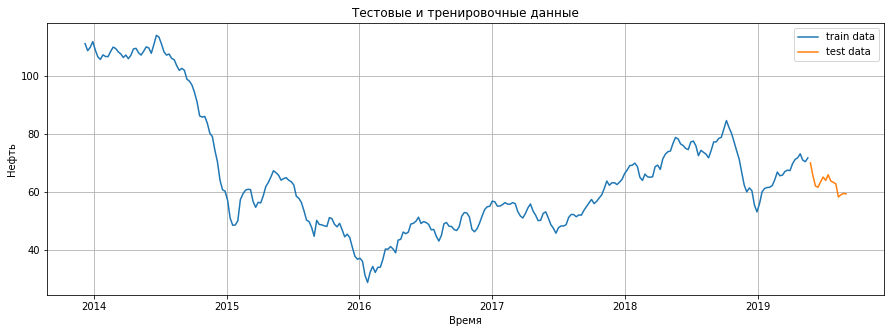

In [51]:
train, test = split_data( brent_data_w[-300:], -15)

plt.figure( figsize=( 15, 5 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.grid()
plt.legend()
plt.show()

In [52]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [53]:
train.shape

(285, 15)

Выделим описание объекта и целевое свойство для тестовой и тренировочной частей ряда. Перейдем к построению моделей.  

# Строим Модель

При решении задачи на начальном этапе, самый интересный результат был получен на модели GradientBoostingRegressor. Остановимся на построении иенно такой формы предсказания. Импортируем необходимые модели.

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

Все модели возьмем в варианте параметров по умолчанию.

In [55]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)
model_l = LinearRegression()

Запускаем модели и смотрим , что они построят на наших примерах.

In [56]:
model_l.fit( X_train, y_train ) # 
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=10, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

**Посмотрим тесты**

In [70]:
X_test.shape

(184, 7)

In [71]:
y_pred_g = model_g.predict(X_train)
y_pred_l= model_l.predict(X_train)

y_test_pred_g = model_g.predict(X_test)
y_test_pred_l= model_l.predict(X_test)

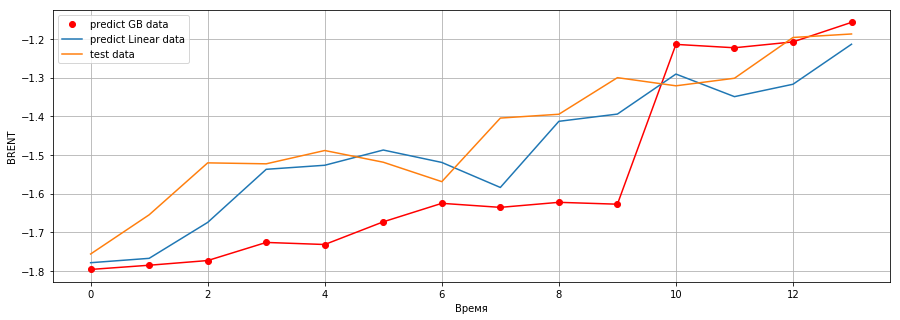

In [72]:

plt.figure( figsize=( 15, 5 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g[:14],'or', label='predict GB data' )
plt.plot(y_test_pred_g[:14],'r' )
plt.plot(y_test_pred_l[:14], label='predict Linear data' )
plt.plot(y_test[:14], label='test data')
plt.grid()
plt.legend()
plt.show()

y_pred_g = model_g.predict(X_train)
y_pred_l= model_l.predict(X_train)

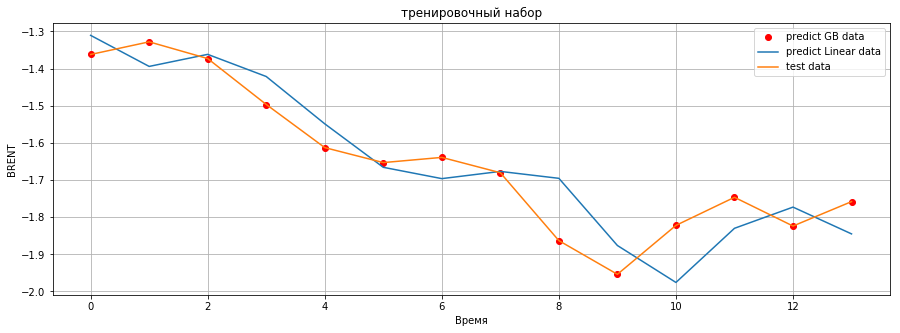

In [73]:
plt.figure( figsize=( 15, 5 ))

plt.title('тренировочный набор')
plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_pred_g[-14:],'or', label='predict GB data' )
plt.plot(y_pred_l[-14:], label='predict Linear data' )
plt.plot(y_train[-14:], label='test data')
plt.grid()
plt.legend()
plt.show()

Линейная модель практически не работает, т.к. видно запаздывание в размере h.Градиентный бустинг практически не отличается от нее на интервале обучения. Посмотрим на оценки.

**Оценки для сравнения моделей**

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [75]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.02197622151391732 
ошибка mae  :   0.11841134015775974 
оценка R2 :   0.8686372763993007


Абсолютная процентная ошибка (MAPE).Обратите внимание, что определять ее для масштабированной переменной не верно. Поэтому переведем ответ решателя обратно в состояние без масштаба.

In [76]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [77]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   5.217089634445641 %


In [78]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.767 (std: 0.182)
Parameters: {'n_estimators': 400, 'max_depth': 1}

Model with rank: 2
Mean validation score: 0.759 (std: 0.190)
Parameters: {'n_estimators': 200, 'max_depth': 1}

Model with rank: 3
Mean validation score: 0.755 (std: 0.177)
Parameters: {'n_estimators': 500, 'max_depth': 1}



In [82]:
model_g_best = GradientBoostingRegressor(max_depth=1,  n_estimators=400)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g_b = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g_b))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   5.883427182567331 %


Модель с первоначальными параметрами лучше, берем за основу ее:

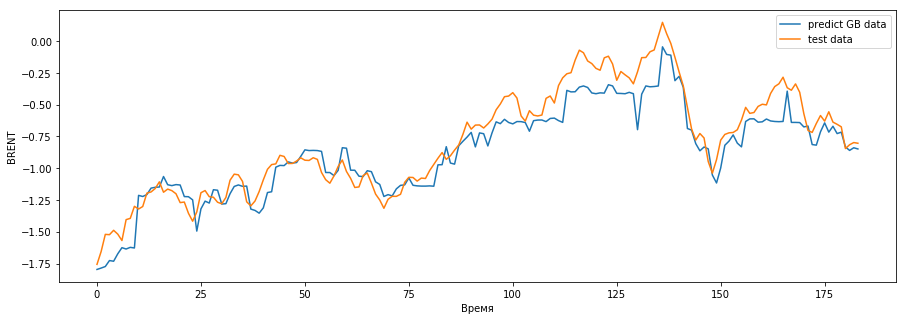

In [80]:

plt.figure( figsize=( 15, 5 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g, label='predict GB data' )
plt.plot(y_test, label='test data')

plt.legend()
plt.show()

## Сохранение модели

In [81]:
import pickle
# save the model to disk
filename = 'final_model_brent.sav'
pickle.dump(model_g, open(filename, 'wb'))

filename = 'final_scaler_brent_y.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'final_scaler_brent_x.sav'
pickle.dump(scl_x, open(filename, 'wb'))


## Вывод:

Модель при смене направления запаздывает на 1 шаг. Также она "сглаживает" резкие колебания.